## 1. Nevarne povezave

Oddelek za gozdarske dejavnosti in motorni promet želi z namenom povečanja varnosti prepovedati kolesarjenje na povezavah, na katerih se zgodi največ kolesarskih nesreč. Raziskava, ki so jo naročili, je pokazala, da je največ nesreč na odsekih, ki jih uporablja največ kolesarjev, zato je očitno logično prepovedati kolesarjenje po njih.

Napišite funkcijo `povezave(pot)`, ki prejme neko pot (niz z imeni križišč, med katerimi so znaki -) in vrne vse odseke na tej poti kot množico parov imen. Klic `povezave("Ana-Berta-Cilka-Berta-Dani") vrne {("Ana", "Berta"), ("Berta", "Cilka"), ("Cilka", "Berta"), ("Berta", "Dani")}`.

Nato napišite funkcijo `popularni(poti, k)`, ki prejme seznam poti, ki so jih opravili kolesarji in vrne k odsekov, ki se pojavijo na največ poteh. Če se isti odsek na neki poti pojavi večkrat, ga štejte le enkrat. Če si k-to mesto deli več odsekov, je vseeno, katere od izenačenih odsekov vrnete. Primer je v testih.

### Rešitev

Človek, ki mu je čas dragocen in si ga želi prihraniti za težje naloge, napiše

In [1]:
from collections import Counter
from itertools import pairwise

def povezave(pot):
    return set(pairwise(pot.split("-")))

def popularni(poti, k):
    return {p for p, _ in Counter(povezava for pot in poti for povezava in povezave(pot)).most_common(k)}

Čeprav bi večina sicer morala vedeti za `pairwise`, najbrž pa tudi za `Counter` in bi morala znati sestaviti izpeljan seznam ... pa se bo omenjena večina najbrž lotila počasneje. Rešimo še tako. (No, `pairwise` bomo vseeno uporabili, brez njega pač uporabimo `zip`, da združi seznam s seznamom brez prvega elementa ... trik, ki ste ga velikokrat videli na predavanjih in v domačih nalogah.)

Prvi del je še vedno preprost: niz razdelimo glede na `-`, jemljemo zaporedne elemente in jih zlagamo v množico.

In [2]:
def povezave(pot):
    pov = set()
    for od, do in pairwise(pot.split("-")):
        pov.add((od, do))
    return pov

Drugi se razdeli v tri dele.

- Najprej preštejemo pojavitve posameznih povezav v poteh. Pri tem štejemo elemente iz množice, ki jo vrne funkcija `povezave`, saj naloga zahteva, da v primeru, da večkratne pojavitve iste povezave na določeni poti štejemo samo enkrat.
- Nato premečemo vse povezave in števce v seznam parov `(števec, povezava)`. Ta seznam uredimo. Ko urejamo terke, bo funkcija `sort` najprej priumerjala prvi element, torej jih bo uredila po (naraščajoči) popularnosti.
- Ker naloga zahteva, da vrnemo množico k najpopularnejših povezav, vzamemo zadnjih `k` elementov seznama. V množico zlagamo druge elemente vsakega para, povezavo.

Vse te stvari - štetje, urejanje po določenem kriteriju, premetavanje v množice ali nazaj - smo v različnih kontekstih počeli že velikokrat. Tule jih samo zložimo skupaj.

In [6]:
def popularni(poti, k):
    pojavitve = {}
    for pot in poti:
        for par in povezave(pot):
            if par not in pojavitve:
                pojavitve[par] = 0
            pojavitve[par] += 1

    pari = []
    for odsek, stevilo in pojavitve.items():
        pari.append((stevilo, odsek))
    pari.sort()

    najpopularnejsi = set()
    for _, povezava in pari[-k:]:
        najpopularnejsi.add(povezava)
    return najpopularnejsi

Kar smo naredili tu, je seveda druga skrajnost. Prva rešitev je bila kratka in preveč profi, ta tu je preveč začetniška. Tudi rešitev, ki ne zahteva več, kot da znamo uporabiti `defaultdict` in izpeljane sezname in množice, ni ravno dolga.

In [7]:
def popularni(poti, k):
    pojavitve = defaultdict(int)
    for pot in poti:
        for par in povezave(pot):
            pojavitve[par] += 1

    pari = [(stevilo, odsek) for odsek, stevilo in pojavitve.items()]
    pari.sort()

    return {povezava for _, povezava in pari[-k:]}

## 2. Minuta za Angelco

Angelca je odkrila, da bi se dalo v zapisu poti uporabiti različna števila minusov; ta bi pomenila čas (v minutah), ki ga je kolesar porabil za določeno povezavo.

Napišite funkcijo `casi(pot)`, ki prejme takšen opis poti in vrne slovar, katerega ključi so pari križišč, vrednosti pa število minusov med tem parom.

Klic `casi("Ana----Berta--Dani------Cilka---Berta-------Ema-Berta--Ana") vrne {("Ana", "Berta"): 4, ("Berta", "Dani"): 2, ("Dani", "Cilka"): 6, ("Cilka", "Berta"): 3, ("Berta", "Ema"): 7, ("Ema", "Berta"): 1, ("Berta", "Ana"): 2}`.

Predpostaviti smete, da se vsak par pojavi le enkrat.

Če je naloga pretežka, predpostavite še, da se tudi vsako križišče pojavi le enkrat, vendar dobite v tem primeru največ 75 % možnih točk naloge.

### Rešitev

Tale naloga je izrazito obrtniška. Nobenih globokih podatkovnih struktur, le programerska spretnost.

Najpreprosteje je spet uporabiti `split("-")`.

In [8]:
def casi(pot):
    razdalje = {}
    od = None
    for kos in pot.split("-"):
        if not kos:
            dolzina += 1
        else:
            if od is not None:
                razdalje[(od, kos)] = dolzina
            od = kos
            dolzina = 1
    return razdalje

`split("-")` nam razdeli pot na seznam, ki vsebuje imena križišč in prazne nize, med dve zaporednima minusoma. Naredimo torej zanko čez te nize.

- V `kos` bomo shranili posamezni niz (križišče ali prazen niz),
- v `dolzina` bomo zapisovali dolžino trenutnega odseka
 -v `od` pa začetek trenutnega odseka - torej tistega, ki je pred trenutnim zaporedjem minusov. Pred zanko nastavimo `od` na `None`, da vemo, da še nismo začeli.

V zanki preverimo, ali je `kos` prazen. Če je tako, le povecamo `dolzina` za 1.

Če `kos` ni prazen, preverimo, ali je `od` različen od `None`. V tem primeru se je končal odsek, katerega krajišči sta `od` in `kos`. Zabeležimo, da je njegova dolžina toliko, kolikor praznih nizov smo našteli (in en več - glej nadaljevanje).

V vsakem primeru pa prepišemo `kos` v `od`, saj se tu začenja novi odsek. Poleg tega nastavimo `dolzina` na 1: razdalja med dvema križiščema je enaka številu minusov, a ker se prazni nizi pojavljajo med dvema zaporednima minusoma, bo praznih nizov za 1 manj, kot je minusov. Zato začnemo z dolžino 1.

Druga rešitev je, da najprej poberemo imena zaporednih križišč, tako da zamenjamo minuse s presledki in pokličemo `split()`, ki bo ignoriral zaporedne presledke.

Za vsako križišče najprej odbijemo od niza `pot` toliko znakov, kolikor je dolgo to križišče. Tako dobimo niz, ki se začne z minusi. Dolžina odseka med tem in naslednjim križiščem je tolikšna, kolikor je teh minusov -- torej toliko, kolikor je niz brez minusov krajši od celega niza.

Nato od poti odbijemo še minuse in nadaljujemo z naslednjim križiščem.

In [9]:
def casi(pot):
    razdalje = {}
    krizisca = pot.replace("-", " ").split()
    for krizisce, naslednje in pairwise(krizisca):
        pot = pot[len(krizisce):]
        brez = pot.lstrip("-")
        razdalje[(krizisce, naslednje)] = len(pot) - len(brez)
        pot = brez
    return razdalje

Rešitev za 75 % uporablja `index`:

In [10]:
def casi(pot):
    krizisca = []
    for krizisce in pot.split("-"):
        if krizisce:
            krizisca.append(krizisce)

    razdalje = {}
    for krizisce, naslednje in pairwise(krizisca):
        razdalje[(krizisce, naslednje)] = pot.index(naslednje) - pot.index(krizisce) - len(krizisce)
    return razdalje

Tokrat smo razdelili kar po `-` in v `krizisca` zložili vsa imena križišč, se pravi neprazne nize.

Nato gremo čez pare križišč: razdalja med dvema je enaka razliki mest (indeksov) na katerih se pojavita tidve križišči, pri čemer moramo od razlike - da dobimo število minusov - odšteti še dolžino imena prvega križišča.

Ta rešitev ne bo delovala, če se isto križišče pojavi le večkrat. Pravzaprav pa je ni težko dopolniti do delujoče rešitve, le v vsakem krogu zanke moramo odbiti tisti del niza, ki smo ga pravkar obdelali.

In [11]:
def casi(pot):
    krizisca = []
    for krizisce in pot.split("-"):
        if krizisce:
            krizisca.append(krizisce)

    razdalje = {}
    for krizisce, naslednje in pairwise(krizisca):
        razdalje[(krizisce, naslednje)] = pot.index(naslednje) - pot.index(krizisce) - len(krizisce)
        pot = pot[pot.index(naslednje):]
    return razdalje

Teh različic je še kolikor hočemo. Nekatere so tudi bolj nerodno "C-jevske" - te ne uporabijo `split`-a, temveč gredo čez znakue niza `pot`. Vsem je skupno, da se moramo nekoliko znajti...

Frajerji, ki poznajo regularne izraze (ki se jih sicer nismo učili, niso pa prepovedani, saj so del standardnih Pythonovih knjižnic) pa napišejo kar

In [12]:
import re

def casi(pot):
    razdalje = {}
    for mo1, mo2 in pairwise(re.finditer(r"[^-]+", pot)):
        razdalje[(mo1.group(), mo2.group())] = mo2.start() - mo1.end()
    return razdalje

ali celo kar

In [13]:
def casi(pot):
    return {(mo1.group(), mo2.group()): mo2.start() - mo1.end()
            for mo1, mo2 in pairwise(re.finditer(r"[^-]+", pot))}

## 3. Povzročanje gneče, iskanje nesreče

Nekateri kolesarji delajo gnečo in izzivajo nesrečo z vožnjo v krogih, na primer `"Ana-Berta-Cilka-Ana-Berta-Cilka-Ana-Berta-Cilka-Ana-Berta-Cilka"`.

Napišite funkcijo `krozenje(pot)`, ki vrne `True`, če pot predstavlja takšno kroženje in `False` sicer. Koliko križišč se ponavlja (v tem primeru so tri) in kolikokrat (tule štirikrat) ni znano.

**Beri naprej:** pravzaprav nekateri kolesarji naredijo tako: prevozijo neko število križišč. Nato ponavljajo ta križišča, vendar v nadaljnjih krogih včasih zamenjajo eno od križišč – vedno največ eno na krog, ne pa nujno vedno isto. Primer takšne poti je `"Ana-Berta-Cilka-Ana-Berta-Dani-Ana-Ema-Cilka-Ana-Berta-Ana-Ema-Berta-Cilka"`. Prvič je zamenjal Cilko z Dani, drugič Berto s Cilko in tretjič Berto z, uh, Ano, četrtič Ano z Berto. Vaša funkcija naj vrne `True` tudi v takšnih primerih.

Za 75 % točk lahko rešite tudi preprostejšo različico, po kateri zahtevamo točne ponovitve.

Namig: preprosto poskusite vse možne dolžine krogov – 2, 3, 4, 5 ...

### Rešitev

Preprosta različica je ... preprosta. Če se ponavlja i križišč, vzamemo prvih `i` in preverimo, ali je seznam sestavljen iz `len(krizisca) // i` ponovitev teh križišč.

In [14]:
def krozenje(pot):
    krizisca = pot.split("-")
    for i in range(2, len(krizisca) // 2 + 1):
        if krizisca == krizisca[:i] * (len(krizisca) // i):
            return True
    return False

Druga je malenkost daljša. Za vsak `i` najprej preverimo, ali deli dolžino seznama. Če je ne, nas ne briga in nadaljujemo `continue` z naslednjim `i`.

Sicer štejemo i, 2i, 3i in tako naprej. Število razlik med prvimi `i` točkami in temi med `i` in naslednjimi i mora biti manjše od 1. Če je večje, prekinemo zanko. Če zanke nismo prekinili, vrnemo `True`. Če se (zunanja) zanka izteče, ne da bi vrnili `True`, pa vrnemo `False`.

In [15]:
def krozenje(pot):
    tocke = pot.split("-")
    for i in range(2, len(tocke) // 2 + 1):
        if len(tocke) % i != 0:
            continue
        prva = tocke[:i]
        for j in range(i, len(tocke), i):
            if sum(x != y for x, y in zip(tocke[j:], prva)) > 1:
                break
        else:
            return True
    return False

Zanimiv je `sum`. V njem seštevamo, kolikokrat je `x != y` resničen, pri čemer `x` dobimo iz neke (domnevne) ponovitve cikla, `y` pa iz prvih `i` točk. Ker je `True` isto kot `1`, bomo dobili število sprememb. `zip` pa, kot vemo, teče do dolžine krajšega od seznamov, zato pri `tocke[j:]` ni potrebno pisati gornje meje (bila bi `tocke[j:j + 1]`, saj jo bo postavil že `zip`.

Tole je malo zavozlano zaradi vseh teh dvojnih zank ter `continue` in `break` in `else`. Napišimo raje preprosteje:

In [16]:
def se_ponavlja(krizisca, i):
    if len(krizisca) % i != 0:
        return False
    prva = krizisca[:i]
    for j in range(i, len(krizisca), i):
        if sum(x != y for x, y in zip(krizisca[j:], prva)) > 1:
            return False
    return True


def krozenje(pot):
    krizisca = pot.split("-")
    for i in range(2, len(krizisca) // 2 + 1):
        if se_ponavlja(krizisca, i):
            return True
    return False

Pomožna funkcija `se_ponavlja` pove, ali se v `krizisca` ponavljajo prvih `i` križišč - mogoče z eno napako. S tem postane funkcija `krozenje` veliko preprostejša.

## 4. Detektiv

Kot ste uganili, so križišča poimenovana po uslužbencih OGDMP. Na vsakem je stal eden od njih in beležil promet. Rezultat tega je, da vsak od njih ve tudi, proti katerim križiščem so kolesarji vozili iz križišč, ki so jih oni dan nadzorovali.

In [17]:
povezave = {
    "Ana": {"Berta"},
    "Berta": {"Dani", "Cilka", "Franci"},
    "Cilka": {"Ema", "Franci", "Iva", "Ana"},
    "Dani": {"Cilka", "Ana"},
    "Ema": {"Iva", "Helga"},
    "Franci": {"Greta", "Iva", "Dani"},
    "Greta": {"Franci"},
    "Jana": {"Klara"},
    "Klara": {"Jana"}
}

pomeni, da so se od, recimo, Dani vozili proti Cilki in Ani.

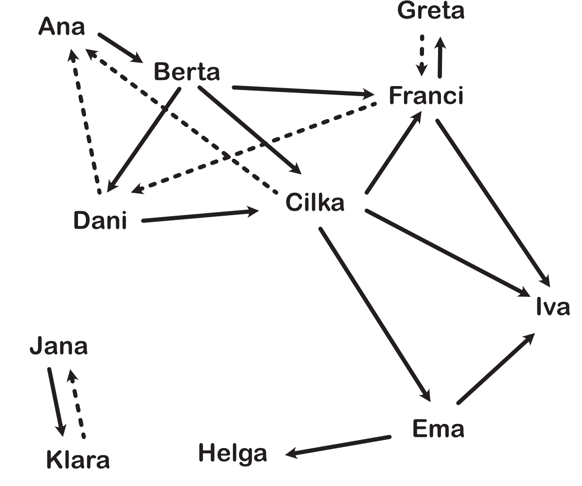

Ker se je ravno tisti dan zgodil na enem od križišč tudi umor, nas zanima, ali je možno, da je kateri od kolesarjev, ki so jih videli na določenem križišču, prišel na križorišče umora.

Lažja varianta (do 75 %): napišite funkcijo detektiv(odkod, kam, povezave), ki vrne True, če je možno, da je šel kdo od odkod do kam. Pri tem smete predpostaviti, da je zemljevid tak, da se nikoli ni možno vrniti v križišče, v katerem smo nekoč že bili (gornja slika brez črtkanih povezav). Klic `detektiv("Ana", "Iva")` vrne `True`, ker je možno, da je šel kdo od Ane do Berte, od ondod k Cilki in potem k Ivi. 

Prava varianta: po zemljevidu se je možno tudi vračati v že obiskana križišča (torej obstajajo tudi črtkane povezave). Funkcija pa dobi še en argument: ko jo bodo klicali testi, bodo kot njegovo vrednost vedno podali prazno množico, vi pa počnite z njim, kar želite. (Namig: če bo funkcija rekurzivna, si boste vanjo nekaj shranjevali. Če ne bo rekurzivna, tega argumenta morda ne potrebujete in ga ignorirajte, vseeno pa ga sprejmite, da bodo testi vedeli, da rešujete to različico.)

Funkcija ne sme spreminjati podanega slovarja.

### Rešitev

To je seveda klasična naloga iz rekurzije - se v rodbini določenega človeka nahaja oseba z določenim imenom.

In [18]:
def detektiv(odkod, kam, odhodi):
    if odkod == kam:
        return True
    for naslednji in odhodi.get(odkod, []):
        if detektiv(naslednji, kam, odhodi):
            return True
    return False

Ali, krajše

In [19]:
def detektiv(odkod, kam, odhodi):
    return odkod == kam or any(detektiv(naprej, kam, odhodi) for naprej in odhodi.get(odkod, ()))

Zaplet je v tem, da se lahko zaciklamo. Če neko križišče že obiščemo, se vanj ne smemo več vračati. Takšna križišča bomo imenovali prepovedana in jih shranjevali v dodatni argument.

In [20]:
def detektiv(odkod, kam, odhodi, prepovedani):
    if odkod == kam:
        return True
    for naslednji in odhodi.get(odkod, []):
        if naslednji not in prepovedani \
                and detektiv(naslednji, kam, odhodi, prepovedani | {odkod}):
            return True
    return False

V četrti argument torej v rekurzivnem klicu dodamo `odkod`, tako da kot zadnji argument podamo `prepovedani | {odkod}`. Preden naredimo rekurzivni klic pa preverimo, da ta ne vodi v prepovedano križišče.

Ali, krajše:

In [21]:
def detektiv(odkod, kam, odhodi, prepovedani):
    return odkod == kam or any(detektiv(naprej, kam, odhodi, prepovedani | {odkod})
                               for naprej in odhodi.get(odkod, set()) - prepovedani)

## 5. Strava

Napišite razred `Strava`.

- Konstruktor prejme seznam segmentov, recimo `Strava(["Ana-Berta-Dani-Ema", "Ana-Berta-Cilka", "Berta-Cilka", "Cilka-Ema-Dani-Ana-Helga", "Helga-Greta-Ema"])`,
- Metoda `dodaj(pot)`, prejme neko pot, ki jo je prevozil nek kolesar, na primer `s.dodaj("Ema-Ana-Berta-Dani-Ema")`.
- Metoda `najpopularnejsi()` vrne tistega od segmentov, podanih konstruktorju, ki se je pojavil v največ poteh, ki smo jih dodali z dodaj(pot). Če se isti segment večkrat pojavi na isti poti, ga štejte le enkrat. Če si mesto najpopularnejšega deli več segmentov, lahko vrnete kateregakoli od njih.

### Rešitev

Kot ponavadi: ko napišemo konstruktor, je vse ostalo jasno. *Napisati konstruktor* v bistvu pomeni razmisliti, kaj bo objekt shranjeval. V našem primeru, očitno, slovar, ki bo štel, kolikokrat se pojavi kateri segment.

In [23]:
class Strava:
    def __init__(self, odseki):
        self.popularnost = {}
        for odsek in odseki:
            self.popularnost[odsek] = 0

    def dodaj(self, pot):
        for odsek in self.popularnost:
            if odsek in pot:
                self.popularnost[odsek] += 1

    def najpopularnejsi(self):
        naj_ods = None
        for ods in self.popularnost:
            if naj_ods is None or self.popularnost[ods] > self.popularnost[naj_ods]:
                naj_ods = ods
        return naj_ods

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


Ali, krajše:

In [24]:
class Strava:
    def __init__(self, odseki):
        self.popularnost = dict.fromkeys(odseki, 0)

    def dodaj(self, pot):
        for odsek in self.popularnost:
            if odsek in pot:
                self.popularnost[odsek] += 1

    def najpopularnejsi(self):
        return max(self.popularnost, key=self.popularnost.get)